In [12]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


In [4]:
cancer_aff = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.all.csv', index_col=0)
alt_aff = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.all.alternate.csv', index_col=0)

In [5]:
cancer_aff.shape, alt_aff.shape

((7137, 673), (629, 1263))

In [6]:
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.all.csv', index_col=0)

In [11]:
high_freq_mutations = list(patient_mutations.sum()[patient_mutations.sum() > 20].index)

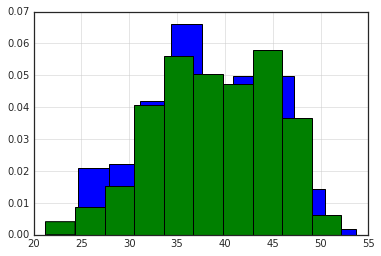

In [19]:
cancer_aff[high_freq_mutations]['BRAF_V600E'].hist(normed=True)
alt_aff[high_freq_mutations]['BRAF_V600E'].hist(normed=True)

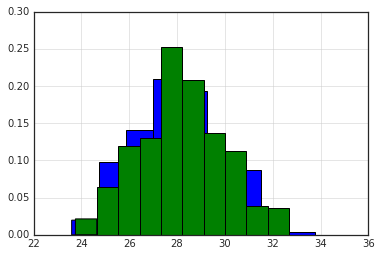

In [25]:
cancer_aff[high_freq_mutations].mean(axis=1).hist(normed=True)
alt_aff[high_freq_mutations].mean(axis=1).hist(normed=True)

In [27]:
sp.mannwhitneyu(cancer_aff[high_freq_mutations].mean(axis=1), alt_aff[high_freq_mutations].mean(axis=1))

MannwhitneyuResult(statistic=2164357.0, pvalue=0.068325982927663523)

In [29]:
cancer_aff[high_freq_mutations].mean(axis=1).median(), alt_aff[high_freq_mutations].mean(axis=1).median()

(28.03336298560942, 28.100003147144516)